In [1]:
# Warmup 0: Complete the 5 TODOs!
def get_wordle_results(guess):
    wordle_result = ""
    for i in range(len(guess)):
        if guess[i] == word_of_the_day[i]:   # TODO_4 Check if the letter is correct.
            wordle_result += "O"
        elif word_of_the_day.find(guess[i]) != -1: # TODO_5 Check if the letter is in the string, but in the wrong place.
            wordle_result += "_"
        else:
            wordle_result += "X"
    return wordle_result

max_num_guesses = 6
current_num_guesses = 1
word_of_the_day = "CRANE"

print("Welcome to PyWordle!")
print("You have 6 guesses to guess a 5 character word.")
print("X\tThe letter is not in the word.")
print("_\tThe letter is in the word, but in the wrong place.")
print("O\tThe letter is in the correct place!")

# TODO_1: Complete the condition so they can only play up to their max # of guesses.
while current_num_guesses <= max_num_guesses:
    guess = input("Guess the word: ")
    
    # TODO_2: Complete the condition to re-prompt the user to
    #         enter their guess until it is the correct length.
    while len(guess) != 5:
        print("A wordle must be exactly 5 characters long!")
        guess = input("Guess the word: ")
        
    # TODO_3: Convert their guess to all upper-case.
    guess = guess.upper()
    
    if guess == word_of_the_day:
        break
        
    wordle_results = get_wordle_results(guess)
    
    print("{}\t{}".format(guess, wordle_results))
    
    current_num_guesses += 1

if current_num_guesses > max_num_guesses:
    print("Better luck next time!")
    print("The word was: {}".format(word_of_the_day))
else:
    print("You won in {} guesses!".format(current_num_guesses))


Welcome to PyWordle!
You have 6 guesses to guess a 5 character word.
X	The letter is not in the word.
_	The letter is in the word, but in the wrong place.
O	The letter is in the correct place!
Guess the word: COLOR
COLOR	OXXX_
Guess the word: CRATE
CRATE	OOOXO
Guess the word: CRANE
You won in 3 guesses!


In [9]:
# Warmup 1:  Try to mutate a string

name = "Plate"


# Change only last letter of name to "o" so that name = "Plato"
# name[-1] = "o" # does not work! We cannot mutate a string

# Change the entire string to be uppercase
name.upper() # does NOT mutate the string

print(name)

# Takeaway: Strings are immutable!

Plate


In [10]:
# Warmup 2: practice using find and in

secret_word = "raspy"

# find the index of 'p'
print(secret_word.find('p'))

# find the index of 'e'
print(secret_word.find('e'))

# now try to use the "in" keyword
# what's the difference?

# find if 'p' is in our secret string
print('p' in secret_word)

# find if 'e' is in our secret string
print('e' in secret_word)

3
-1
True
False


# CS220: Lecture 14


## Learning Objectives
After this lecture you will be able to...
- Create a list and use sequence operations on a list.
- Write loops that process lists
- Explain key differences between strings and lists: type flexibility, mutability
- Mutate a list using 
  - indexing and double indexing, 
  - methods such as append, extend, sort, and pop
- split() a string into a list
- join() list elements into a string

### Create a list and use sequence operations on a list.

In [11]:
# A list is a sequence seperated by commas

# add one more thing to your grocery_list
grocery_list = ["butter", "milk", "eggs", "apples", "macNcheese", "bananas", "applez" ] 
print(grocery_list, len(grocery_list), sep='\t')
print(grocery_list[-1])

['butter', 'milk', 'eggs', 'apples', 'macNcheese', 'bananas', 'applez']	7
applez


In [12]:
# Sequence Operations:  indexing, slicing

print(grocery_list, len(grocery_list), sep='\t')

# TODO: print the 2nd item in grocery _list
print(grocery_list[1])

# TODO: print the last item in grocery_list
print(grocery_list[-1])    

# TODO: slice the list!
print(grocery_list[1:4])  


['butter', 'milk', 'eggs', 'apples', 'macNcheese', 'bananas', 'applez']	7
milk
applez
['milk', 'eggs', 'apples']


In [13]:
# Why does the following give an IndexError? 
print(grocery_list[len(grocery_list)])

# Tell your neighbor
# Then, explain it in your own words

# Try running the below

print(grocery_list)
print(len(grocery_list))

# Notice that the len of grocery_list is 1 more than the final index.
# Therefore, we should really run...
print(grocery_list[len(grocery_list) - 1])

IndexError: list index out of range

In [14]:
# Lists can be concatented with +
[10, 20, 30] + [13, 4, 9, 8]

# add one more + and a list at the end of this expression

[10, 20, 30, 13, 4, 9, 8]

In [15]:
# the 'in' operator can be applied to a list
favorite_numbers = [4, 7, 14, 17, 84]
print(7 in favorite_numbers)

# make a false statement
print(8 in favorite_numbers)

True
False


In [16]:
# Lists can be repeated with *
["LET'S", "GO", "RED"] * 3

["LET'S", 'GO', 'RED', "LET'S", 'GO', 'RED', "LET'S", 'GO', 'RED']

### Write loops that process lists

In [17]:
import project
help(project)

Help on module project:

NAME
    project

FUNCTIONS
    __init__()
        This function will read in the csv_file and store it in a list of dictionaries
    
    count()
        This function will return the number of records in the dataset
    
    get_age(idx)
        get_age(idx) returns the age of the student in row idx
    
    get_cats_or_dogs(idx)
        get_cats_or_dogs(idx) returns whether student in row idx likes cats or dogs
    
    get_lecture(idx)
        get_lecture(idx) returns the lecture of the student in row idx
    
    get_other_majors(idx)
        get_other_majors(idx) returns the secondary major of the student in row idx
    
    get_pizza_topping(idx)
        get_pizza_topping(idx) returns the preferred pizza toppings of the student in row idx
    
    get_primary_major(idx)
        get_primary_major(idx) returns the primary major of the student in row idx
    
    get_procrastinator(idx)
        get_procrastinator(idx) returns whether student in row idx is a

In [18]:
# TODO Get a list of all engineering majors in LEC005
import project
engineering_major_list = []
for idx in range(project.count()):
    current_major = project.get_primary_major(idx)
    current_lec = project.get_lecture(idx)
    if current_major.lower().startswith('engineering') and current_lec == "LEC005":
        engineering_major_list.append(current_major)
print(len(engineering_major_list))
print(engineering_major_list)

22
['Engineering: Other', 'Engineering: Mechanical', 'Engineering: Biomedical', 'Engineering: Mechanical', 'Engineering: Mechanical', 'Engineering: Mechanical', 'Engineering: Mechanical', 'Engineering: Mechanical', 'Engineering: Industrial', 'Engineering: Industrial', 'Engineering: Other', 'Engineering: Biomedical', 'Engineering: Industrial', 'Engineering: Mechanical', 'Engineering: Other', 'Engineering: Mechanical', 'Engineering: Industrial', 'Engineering: Mechanical', 'Engineering: Industrial', 'Engineering: Industrial', 'Engineering: Mechanical', 'Engineering: Mechanical']


In [21]:
# count how many words have length > 5 in grocery_list
grocery_list = ["butter", "milk", "eggs", "apples", "macNcheese"]
count = 0
for word in grocery_list:
    if len(word) > 5:
        count += 1
print(count)

3


In [22]:
def longest_word(word_list):
    '''Given a list of strings, return the string with the longest length.
    If more than one, return the first occurrence.'''
    
    max_length = 0
    longest_word = None
    for i in range(len(word_list)):
        current_word = word_list[i]
        current_length = len(current_word)
        if longest_word == None or current_length > max_length:
            longest_word = current_word
            max_length = current_length
    return longest_word
    

print(grocery_list)
print(longest_word(grocery_list))
print(longest_word(['aaaa', 'xzy', 'hello']))
# TODO: What if we wanted to print the last occurence?
#       You would change Line 10 to be current_length >= max_length
#print(longest_word(['aaaa', 'xzy', 'hello', 'world']))

['butter', 'milk', 'eggs', 'apples', 'macNcheese']
macNcheese
hello


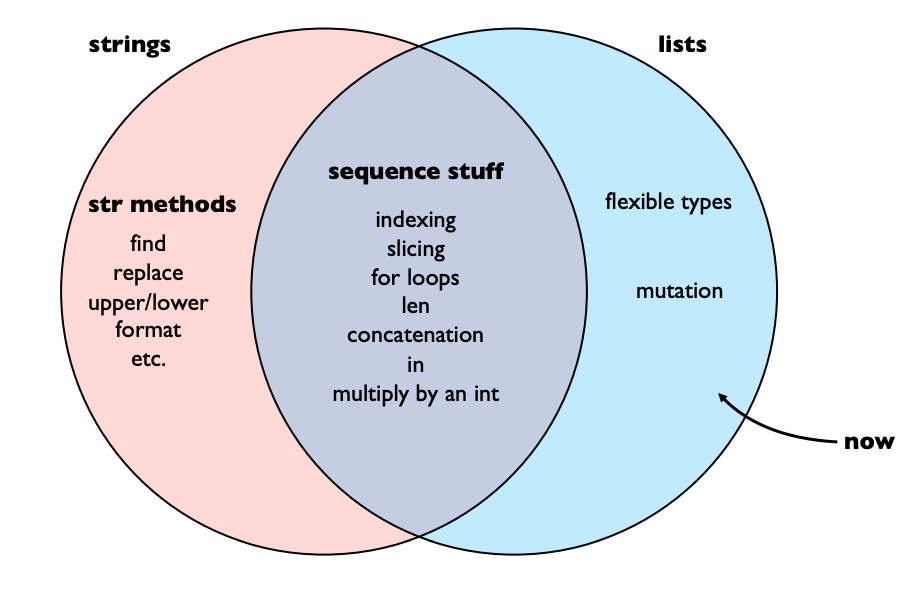

### Explain key differences between strings and lists: type flexibility, mutability

In [23]:

# Difference 1:  a string only holds characters, a list can hold anything
list3 = ["hello", 14, True, 5.678, ["list", "inside", "a", "list"]]

# TODO: fix the bug in this loop
for i in (range(len(list3))):
    # TODO: Print out the type of the current item as well.
    print(i, list3[i], type(list3[i]))
print()

# TODO: print out the last thing in list3
print(list3[-1])

# TODO: print out the word "inside" using double indexing
print(list3[-1][1])

# TODO: print out the type of the last thing in list3
print(type(list3[-1]))

0 hello <class 'str'>
1 14 <class 'int'>
2 True <class 'bool'>
3 5.678 <class 'float'>
4 ['list', 'inside', 'a', 'list'] <class 'list'>

['list', 'inside', 'a', 'list']
inside
<class 'list'>


In [26]:
# A list of lists!
game_grid = [
    [".", ".", ".", ".", ".", "S"],
    [".", "S", "S", "S", ".", "S"],
    [".", ".", ".", ".", ".", "S"],
    [".", ".", ".", ".", ".", "."],
    [".", ".", ".", ".", "S", "."],
    [".", ".", ".", ".", "S", "."]
]

for row in game_grid:
    for position in row:
        print(position, end = "")
    print()

.....S
.SSS.S
.....S
......
....S.
....S.


In [24]:
# Difference 2: a string is immutable....

name = "Miles"
#Question:  which of the following two lines will cause Runtime error? 
name = "Andrew"  
name[-1] = "a" 
print(name)

TypeError: 'str' object does not support item assignment

### Mutate a list using indexing and double indexing,

In [25]:
# ... but the elements of a list are mutable
list3 = ["hello", 14, True, 5.678, ["list", "inside", "a", "list"]]

#list3.append("test string")
# change 14 to your favorite number
list3[1] = 23

# change "a" to "another"
list3[4][2] = 'another'

print(list3)

['hello', 14, True, 5.678, ['list', 'inside', 'a', 'list']]
['hello', 23, True, 5.678, ['list', 'inside', 'another', 'list']]


### Mutate a list using methods such as append,  extend, pop, and sort

In [1]:
# append adds onto the end
new_groc_list = ['peanut butter', 'bread', 'jelly']
new_groc_list.append("nutella") 

# add something else onto the end
print(new_groc_list)

['peanut butter', 'bread', 'jelly', 'nutella']


In [2]:
# extend adds the elements of a list, one at a time, to the end of another list
new_groc_list.extend(['cheese', 'pickle'])
new_groc_list

['peanut butter', 'bread', 'jelly', 'nutella', 'cheese', 'pickle']

In [24]:
new_groc_list.append(['tuna', 'sausage'])
new_groc_list

['peanut butter',
 'bread',
 'jelly',
 'nutella',
 'cheese',
 'pickle',
 ['tuna', 'sausage']]

In [25]:
# pop removes by index
# the default value of pop is -1
print(new_groc_list)
new_groc_list.pop()
print(new_groc_list)

# pop 'bread'
new_groc_list.pop(1)
print(new_groc_list)

['peanut butter', 'bread', 'jelly', 'nutella', 'cheese', 'pickle', ['tuna', 'sausage']]
['peanut butter', 'bread', 'jelly', 'nutella', 'cheese', 'pickle']
['peanut butter', 'jelly', 'nutella', 'cheese', 'pickle']


In [26]:
# remove removes by matching value
print(new_groc_list)
new_groc_list.remove('cheese')
print(new_groc_list)

['peanut butter', 'jelly', 'nutella', 'cheese', 'pickle']
['peanut butter', 'jelly', 'nutella', 'pickle']


In [27]:
nums = [45, 13, 87, 23, 97, 44, 50, 7]
nums.sort() # sort by natural ordering
print(nums)

[7, 13, 23, 44, 45, 50, 87, 97]


In [28]:
# sort mutates a list
nums = [13, 87, 23, 97, 44, 50, 7]
nums.sort() # sort by natural ordering

print(nums) 
print(len(nums), len(nums) // 2)  # print the length of nums

# print out the median value:
if len(nums) % 2 == 0:
    print((nums[len(nums) // 2 - 1] + nums[len(nums) // 2]) / 2)
else:
    print(nums[len(nums) // 2])

[7, 13, 23, 44, 50, 87, 97]
7 3
44


### split() a string into a list

In [29]:
# split turns a string into a list based on a string to split off of
# https://www.w3schools.com/python/ref_string_split.asp

groceries_input = input("Enter your grocery list: ")
groceries = groceries_input.split(":") 
print(groceries)
if not 'nutella' in groceries:
    print('Don\'t forget the nutella!')

Enter your grocery list: bananas:apples:oranges
['bananas', 'apples', 'oranges']
Don't forget the nutella!


In [30]:
# join turns a list into a single string

print(grocery_list)
print(" ".join(grocery_list))

['butter', 'milk', 'eggs', 'apples', 'macNcheese', 'bananas', 'applez']
butter milk eggs apples macNcheese bananas applez


In [32]:
# Write a program that manages a grocery list!
# A: Add an item. Ask the user to add an item to their list.
# D: Delete an item. Ask the user what to remove from their list.
# P: Print the grocery list.
# Q: Quit.

my_groceries = []

while True:
    choice = input("What do you want to do? (A, D, P, Q): ")
    
    # TODO Improve handling of errors (e.g. user tries to remove a food that doesn't exist)
    choice = choice.upper()
    if choice == 'A':
        add_food = input("What do you want to add? ")
        my_groceries.append(add_food)
    elif choice == 'D':
        rem_food = input("What do you want to remove? ")
        my_groceries.remove(rem_food)
    elif choice == 'P':
        print("Your groceries are ", my_groceries)
    elif choice == 'Q':
        break
    else:
        print('I don\'t understand. Please try again!')
        
print('Thanks for shopping!')

What do you want to do? (A, D, P, Q): A
What do you want to add? banaa
What do you want to do? (A, D, P, Q): p
Your groceries are  ['banaa']
What do you want to do? (A, D, P, Q): a
What do you want to add? apples
What do you want to do? (A, D, P, Q): D
What do you want to remove? banaa
What do you want to do? (A, D, P, Q): P
Your groceries are  ['apples']
What do you want to do? (A, D, P, Q): Q
Thanks for shopping!


In [33]:
# Solution to above

def profanity_filter(sentence, bad_words):
    ''' replaces all instances of any word in bad_words with \n
    a word with the first letter and then @s and the same length'''
    
    sentence_split = sentence.split(" ")
    cleaned_sentence = []
    
    for word in sentence_split:
        # TODO We need to improve this! Extra practice!
        if word in bad_words:
            cleaned_word = word[0] + "@" * (len(word) - 1) 
            cleaned_sentence.append(cleaned_word)  
        else:
            cleaned_sentence.append(word)
    # all done cleaning, now join and return
    return " ".join(cleaned_sentence)
    
    
bad_word_list = ["darn", "heck", "crud", "exam"]
print(profanity_filter("I unplugged that darn Alexa", bad_word_list))
print(profanity_filter("What the heck was my boss thinking?", bad_word_list))
print(profanity_filter("He is full of crud?", bad_word_list))

I unplugged that d@@@ Alexa
What the h@@@ was my boss thinking?
He is full of crud?
